# K-Nearest Neighbor whether a person will have diabetes or not 

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('diabetes.csv')
print(len(df))
df.head()


768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#replacing Zeroes
zeroes=['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for i in zeroes:
    df[i]=df[i].replace(0,np.NaN)
    mean=int (df[i].mean(skipna=True))
    df[i]=df[i].replace(np.NaN,mean)


In [8]:
#splitting Datasets first training and testing 
x =df.iloc[:,0:8] #extracting independent variables 
y=df.iloc[:,8]     #o/p ,extracting dependent variables
x_train, x_test, y_train, y_test = train_test_split(x, y ,random_state = 0, test_size = 0.2)
print("Training and testing split was successful")


Training and testing split was successful


In [9]:
#feature scaling/ data scaling
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [10]:
import math
print(len(y))
print(math.sqrt(len(y_train)))
print(math.sqrt(len(y_test)))#get an odd no for testing so 11

768
24.779023386727733
12.409673645990857


In [11]:
#Initializing the KNN model
knn=KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')

In [12]:
knn.fit(x_train,y_train) # fit the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [17]:
#for getting the predictions using the classifier fitted above
y_pred = knn.predict(x_test)
print (y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [19]:
#Evaluating Model
conf_matrix=confusion_matrix(y_test,y_pred) #summary on prediction results on classification model
print(conf_matrix)
#       | predicted | predicted
#actual |    tp       |   fn
#actual |    fp     |     tn
#primary diagonal is the correct ones and secondary diagonal is wrong ones

[[94 13]
 [15 32]]


In [20]:
#f1 score
f1=f1_score(y_test,y_pred)
print(f1)

0.6956521739130436


In [21]:
#Accuracy
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8181818181818182


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

   micro avg       0.82      0.82      0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



[0.7532467532467533, 0.7467532467532467, 0.7857142857142857, 0.7987012987012987, 0.7597402597402597, 0.7857142857142857, 0.7922077922077922, 0.8181818181818182, 0.7987012987012987, 0.8051948051948052, 0.8181818181818182, 0.7987012987012987, 0.8181818181818182, 0.7987012987012987, 0.8116883116883117, 0.7857142857142857, 0.7857142857142857, 0.7922077922077922, 0.7792207792207793, 0.7857142857142857, 0.7792207792207793, 0.7922077922077922, 0.7857142857142857, 0.7857142857142857, 0.7922077922077922, 0.7792207792207793, 0.8181818181818182, 0.8051948051948052, 0.7987012987012987, 0.7987012987012987, 0.7987012987012987]
Average Accuracy: 0.7919983242563889


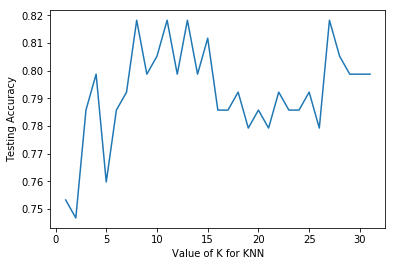

In [26]:
# try K=1 through K=31 and record testing accuracy
k_range = range(1, 32)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 32
# We append the scores in the dictionary
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)
print ("Average Accuracy:",sum(scores)/len(scores))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

# How to use GridSearchCV in this knn example

In [28]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,32))
grid_params={#'n_neighbors':[7,11,19,23,29,31,37],
            'n_neighbors':list(range(1,32)),
             'weights':['uniform', 'distance'], 
             'metric': ['euclidean','manhattan']}


grid=GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
#total 7*2*3*4 = 168 times the model will be running
grid_results = grid.fit(x_train, y_train)
print("\n")
print ("\n")
print(grid_results)


Fitting 5 folds for each of 124 candidates, totalling 620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.9s






GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)


[Parallel(n_jobs=-1)]: Done 620 out of 620 | elapsed:    5.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
#print(grid.cv_results_)
#we are interested just in mean_test_score for a strict evaluation of the hyper-parameters' performances, 
#but mean_train_score can help us figure out how much the model has fitted the data using certain parameters 
#and how much this is relative to test data (for instance by building a validation curve plot

#print('Parameters:\n',grid.cv_results_['params'])
#print("\n\n")
#print(grid.cv_results_['mean_train_score'])
#print("\n\n")
#print(grid.cv_results_['mean_test_score'])
#print("\n")
print('Mean Train Score :', grid.cv_results_['mean_train_score'].mean())
print('Mean Test Score :', grid.cv_results_['mean_test_score'].mean())


Mean Train Score : 0.895513370907499
Mean Test Score : 0.7324787222864347


In [40]:
print ("Grid best Score:",grid.best_score_)
print("\n")
print ("Grid Best Parameters:",grid.best_params_)
print ("\n")
print ("Grid Best Estimators:",grid.best_estimator_)

Grid best Score: 0.754071661237785


Grid Best Parameters: {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'}


Grid Best Estimators: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='distance')


### Plotting with different values of k in the assumed range with the other two best parameters obtained from GridSearchCV

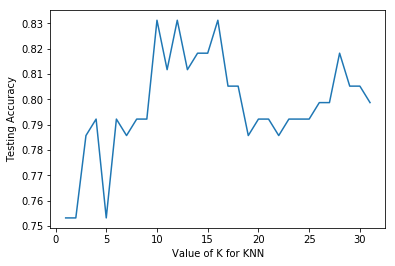

In [41]:
scores = []
for i in k_range:
    model = KNeighborsClassifier(metric = "euclidean", n_neighbors = i , weights = "distance")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()